#     Laptop Price Prediction - Regression

The dataset contains information about different laptop models, their configurations, and corresponding prices.

In [3]:
#Importing Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [6]:
#importing data
df=pd.read_csv('laptop_data.csv')

# EDA - Explorary Data Analysis

In [7]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
675,675,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,68944.32
76,76,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,27652.32
1025,1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,83063.52
1192,1192,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.86kg,25840.80
667,667,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon 530,Windows 10,2.1kg,39693.60
1125,1125,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,88924.32
1124,1124,Asus,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2kg,23176.80
807,807,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8GB,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04kg,33513.12
152,152,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,26533.44
1065,1065,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,77682.24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [10]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [11]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Visualization

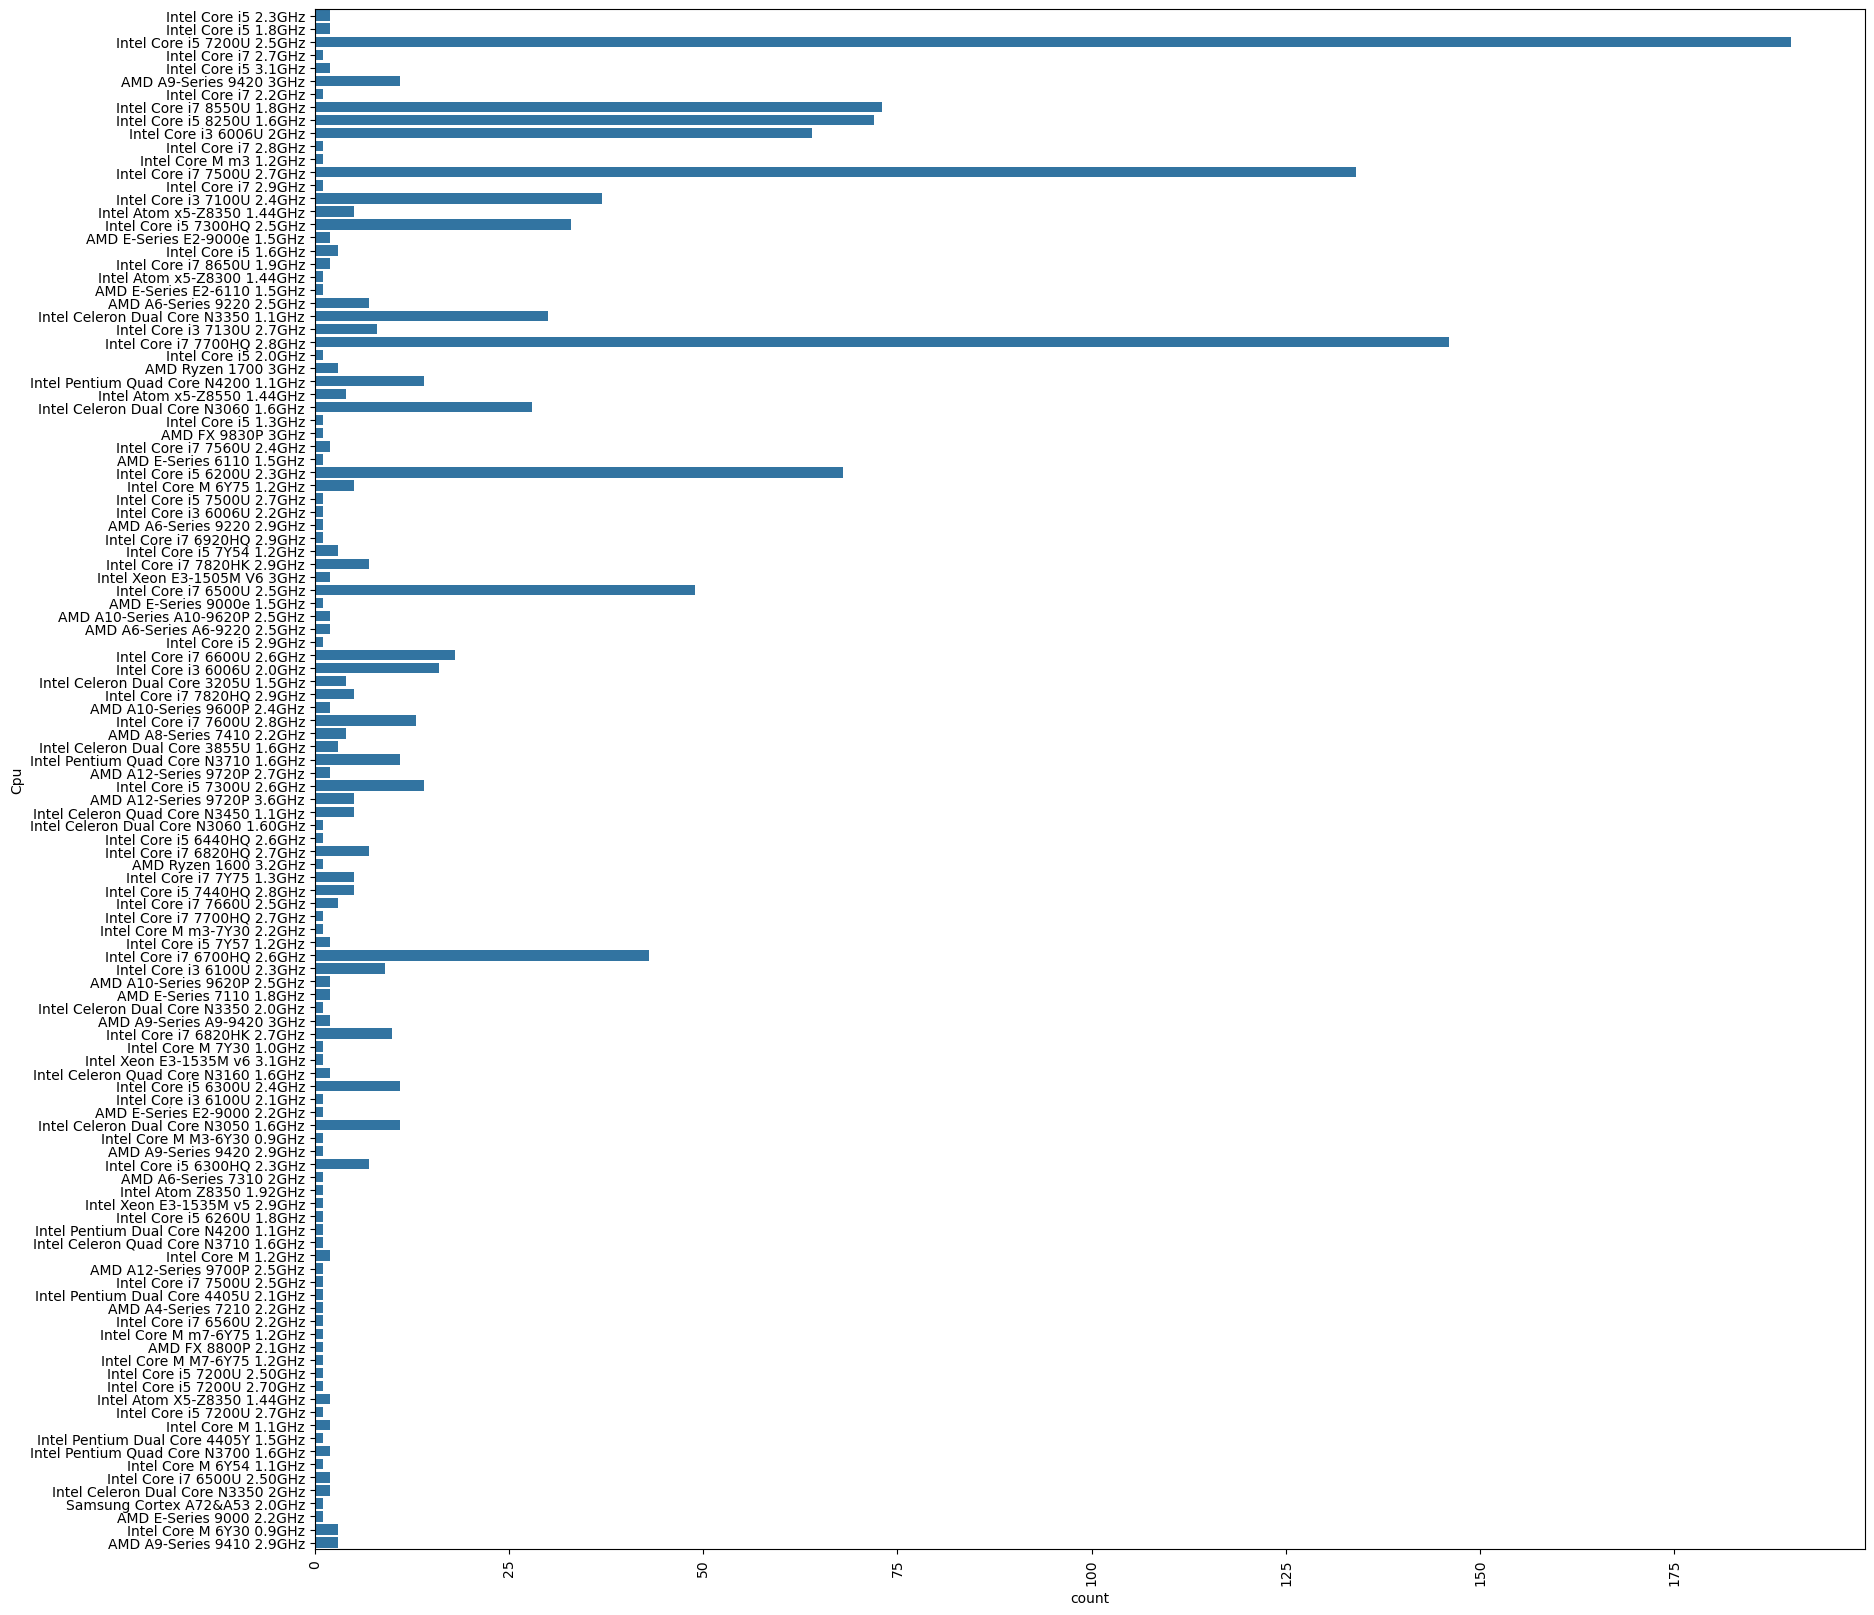

In [21]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Cpu'])
plt.xticks(rotation=90);

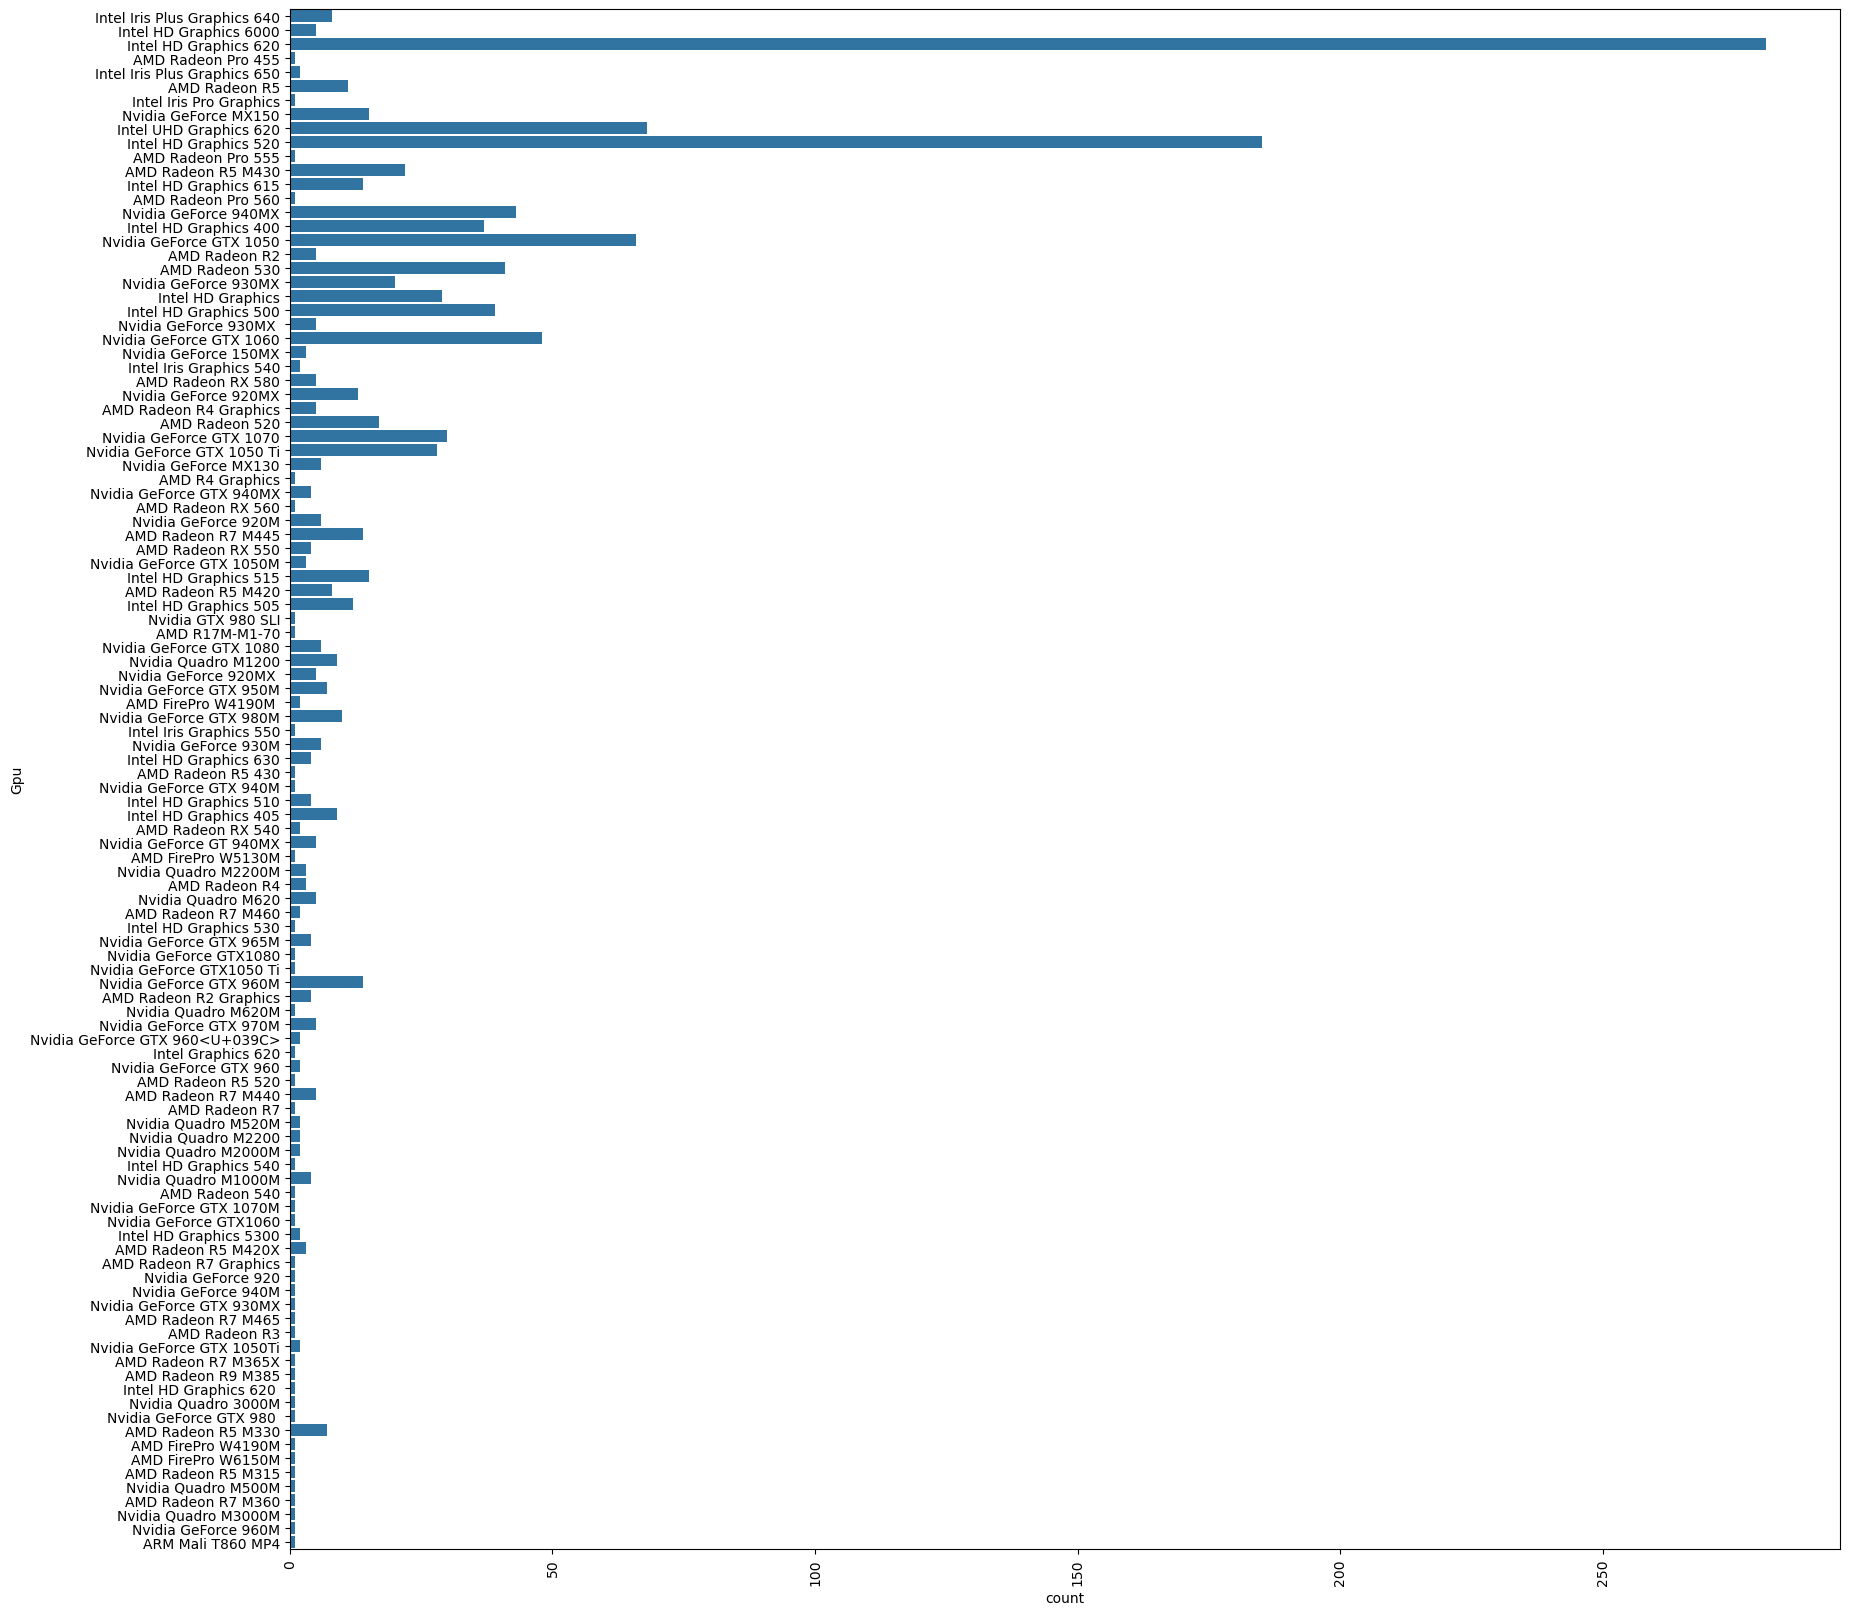

In [22]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Gpu'])
plt.xticks(rotation=90);

<Axes: xlabel='Price', ylabel='Density'>

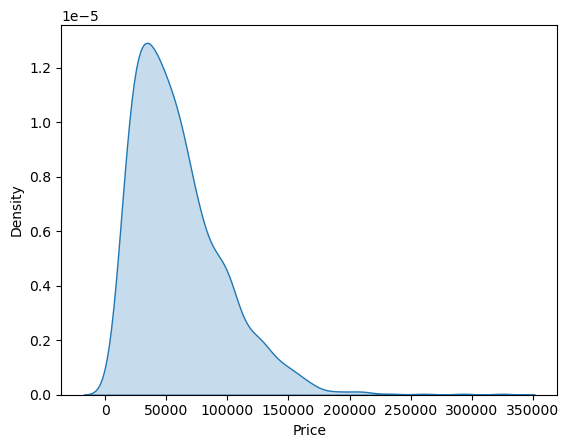

In [25]:
sns.kdeplot(df['Price'],fill=True)

# Feature Engineering

In [12]:
object_columns=df.select_dtypes(include=['object']).columns.tolist()#got help from POE

In [14]:
df_dummies=pd.get_dummies(df, columns=object_columns, drop_first=True)

In [15]:
df_dummies.sample(5)

,Unnamed: 0,Inches,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,...,Weight_2.5kg,Weight_2.62kg,Weight_2.63kg,Weight_2.65kg,Weight_2.67kg,Weight_2.69kg,Weight_2.6kg,Weight_2.71kg,Weight_2.72kg,Weight_2.73kg,Weight_2.75kg,Weight_2.77kg,Weight_2.79kg,Weight_2.7kg,Weight_2.83kg,Weight_2.8kg,Weight_2.94kg,Weight_2.99kg,Weight_2.9kg,Weight_2kg,Weight_3.0kg,Weight_3.14kg,Weight_3.21kg,Weight_3.25kg,Weight_3.2kg,Weight_3.31kg,Weight_3.35kg,Weight_3.3kg,Weight_3.42kg,Weight_3.49kg,Weight_3.4kg,Weight_3.52kg,Weight_3.58kg,Weight_3.6kg,Weight_3.74kg,Weight_3.78kg,Weight_3.8kg,Weight_3kg,Weight_4.0kg,Weight_4.14kg,Weight_4.2kg,Weight_4.33kg,Weight_4.36kg,Weight_4.3kg,Weight_4.42kg,Weight_4.4kg,Weight_4.5kg,Weight_4.6kg,Weight_4.7kg,Weight_4kg
714,714,15.6,76012.4448,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
328,328,12.5,71128.8000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1071,1071,15.6,63882.7200,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38,38,15.6,26037.4032,False,False,False,False,False,False,True,Fals

In [16]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
79,79,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,52054.56
683,683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 520,Windows 10,2.5kg,37242.72
306,306,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,105228.00
1273,1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
651,651,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,37775.52


# Modelling

In [30]:
x = df_dummies.drop(['Price'], axis=1)
y = df['Price']


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable


In [33]:
x.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in x.columns]

In [34]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Ridge,8.640846e-01,1.399906e+04,9.029186e+03
Lasso,8.538386e-01,1.451714e+04,9.644768e+03
Gradient Boosting,7.852152e-01,1.759813e+04,1.205730e+04
XGBRegressor,7.601588e-01,1.859630e+04,1.062539e+04
Decision Tree,7.143364e-01,2.029514e+04,1.327564e+04
Extra Tree,6.787479e-01,2.152225e+04,1.232126e+04
ElasticNet,3.636564e-01,3.029078e+04,1.995285e+04
KNeighborsRegressor,3.600653e-01,3.037613e+04,2.483787e+04
SVR,-2.953159e-02,3.852871e+04,2.641309e+04
AdaBoost,-1.342079e-01,4.043999e+04,2.866184e+04
